Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Load the dataset

In [3]:
df = pd.read_csv('data/stud.csv')
# Display the first few rows of the DataFrame
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(f"Shape of the DataFrame: {df.shape}")

Shape of the DataFrame: (1000, 8)


## Dataset Info:
    gender - sex of students(male/female)
    race_ethnicity - ethnicity of students(Group A,B and C)
    parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
    lunch : having lunch before test (standard or free/reduced)
    test preparation course : complete or not complete before test
    math score
    reading score
    writing score

## Checks to perform
    Missing values
    Duplicate values
    Check data type
    Check statistics of data set
    Check unique values in each column

In [7]:
# check missing values
print("Missing values in each column:")
print(df.isnull().sum())
# check data types
print("\nData types of each column:")
print(df.dtypes)
# check basic statistics
print("\nBasic statistics of the DataFrame:")
print(df.describe())

Missing values in each column:
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Data types of each column:
gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

Basic statistics of the DataFrame:
       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000     

In [11]:
#count unique values in each column
print("\nUnique values in each column:")
print(df.nunique())
# check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Unique values in each column:
gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Number of duplicate rows:
0


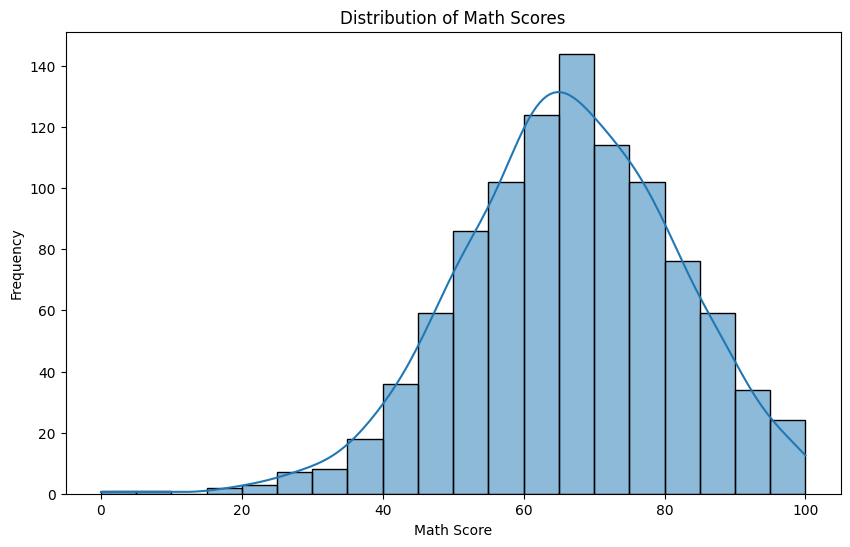

In [8]:
# Visaulize the distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(df['math_score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()


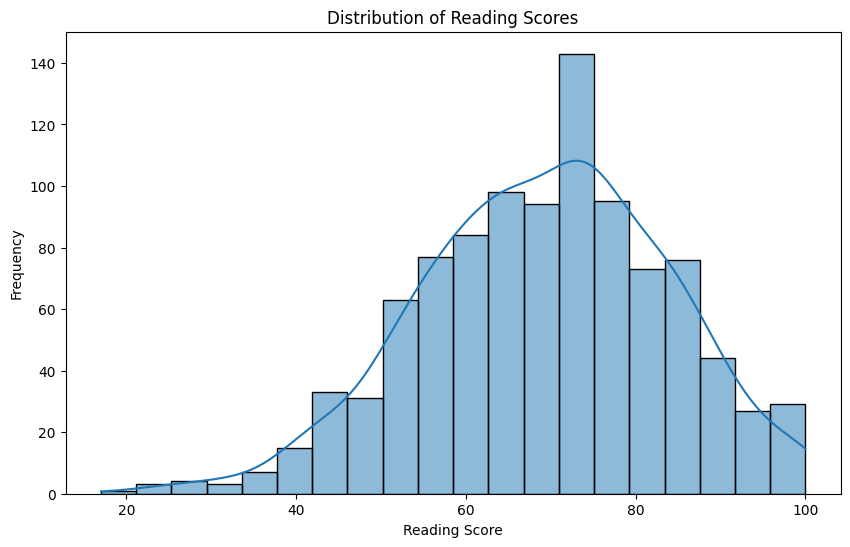

In [9]:
# Distribution of reading scores
plt.figure(figsize=(10, 6))
sns.histplot(df['reading_score'], bins=20, kde=True)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.show()

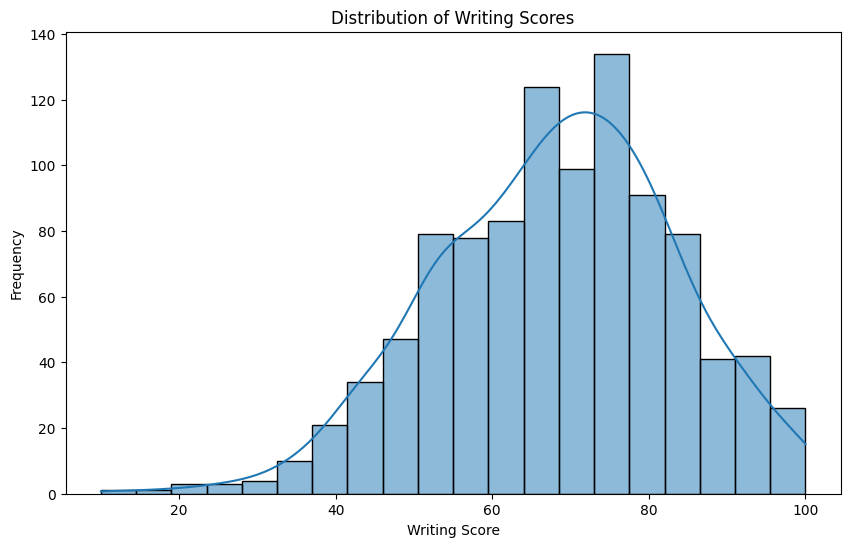

In [10]:
# Visualise distribution of writing scores
plt.figure(figsize=(10, 6))
sns.histplot(df['writing_score'], bins=20, kde=True)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()

In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

## Adding Total and Average Score Column

In [16]:
df['Total_Score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_Score'] = df['Total_Score'] / 3

df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


## Exploring the data and getting insights

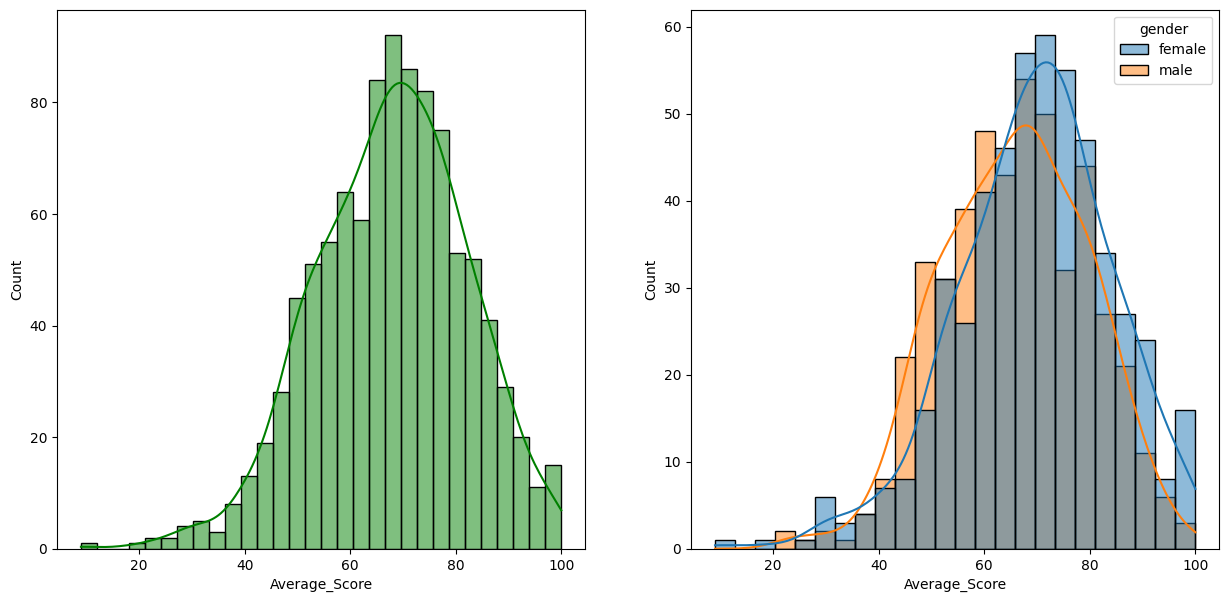

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_Score',kde=True,hue='gender')
plt.show()

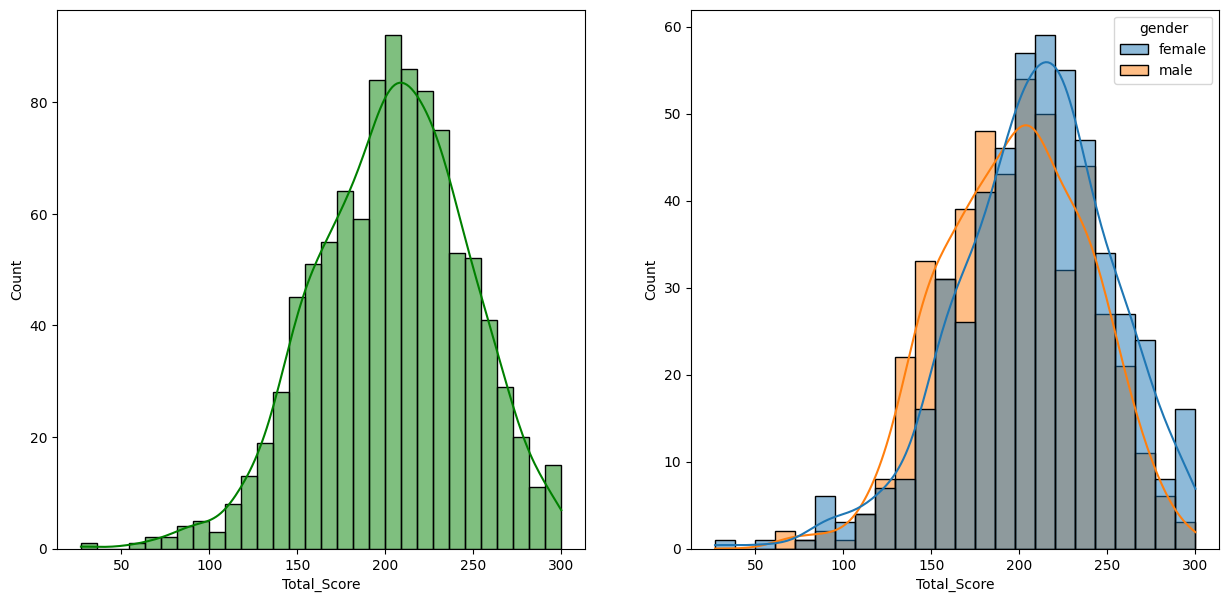

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Score',kde=True,hue='gender')
plt.show()

### Insights
Female students perform better than males